In [54]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 10 15:11:31 2019

@author: lgilbert
"""

# read_sequences function
# PARAMETER : the filename (the file is in fasta format)
# RETURNS : a dictionnary with all the protein sequences, all associated to 
# their identifiers as a key 

def read_sequences(filename) :
    
    # opening the file whose name is filename
    fd = open(filename,'r')
    txt = fd.read()
    fd.close()
    
    # txt contains all the text of the file. 
    # first, I want to seperate the proteins, the symbol that starts a new protein is '>'
    proteins = txt.split('>')[1:]

    dicoSeq = dict()
    
    for prot in proteins :
        #print(prot)
        ID = prot.split('|')[1]
        seqs = prot.split('\n')[1:]
        s = ""
        for seq in seqs :
            s = s + seq
            dicoSeq[ID] = s
    return(dicoSeq)
    
# read_words function 
# Parameter : txt file containing the list of words 
# Returns : a list af the selected common words of 4 letters or more 

def read_words(file):
    
    with open(file) as word_file:
        valid_words = set(word_file.read().split('\n')[1:])
        firstlist = list(valid_words)
    listWords = []
    
    # we don't want to keep words with less than 4 letters 
    # first we count how many there are
    todelete = 0
    for i in range(0, len(firstlist)) :
        if len(firstlist[i]) < 4 :
            todelete = todelete + 1 
            
    # then we delete them from the list 
    for i in range(0, len(firstlist)-todelete) :
        if len(firstlist[i]) < 4 :
            del(firstlist[i])
        # we need every word to be in upper characters like in the proteome
        else : 
            s = firstlist[i]
            listWords.append(s.upper())
            
    listWords = sorted(listWords) # to have it in the alphabetic order 
    
    return listWords

# search_words_in_proteome function
# Parameter : the txt file containing the words and the fasta file containing the sequences
# returns : A dictionnary object with the word as key, each being associated to the number 
# of time it has been found, the number of sequences in wich it has been found and the list
# of the ID of the corresponding sequences 

def search_words_in_proteome(dico, proteome) : # dico must be a ".txt" file and 
                                              # proteome a ".fasta" file 
    listproteome = read_sequences(proteome)
    listwords = read_words(dico)
    
    nwords = len(listwords)
    
    wordseq = dict() 

    for word in range(0, nwords) :
        nbletter = len(listwords[word])
        nbword = 0
        listseq0 = [] # will contain all the ID of the sequences in which word appears
        
        for key in listproteome.keys() : 
            nbaa = len(listproteome[key])
            
            for i in range(0, nbaa-nbletter) :
                if listproteome[key][i:i+nbletter]==listwords[word] :
                    nbword = nbword + 1
                    listseq0.append(str(key))
                    
        # listseq0 may contain several time the same ID      
        listseq1 = []
        for x in listseq0 :
            if x not in listseq1:
                listseq1.append(x) 
                
        nbseq = len(listseq1) # number of sequences in wich word appears       
                    
        if nbword != 0 :
            print("I found '" + str(listwords[word]) + "' " + str(nbword) +
                  " times in " + str(nbseq) + " sequences of the human proteome")
            if nbword >= 1 : 
                wordseq[listwords[word]] = [nbword] 
                wordseq[listwords[word]].append(nbseq)
                wordseq[listwords[word]].append(listseq1) 
               
    return wordseq
                            
s = search_words_in_proteome('english-words.txt','human-proteome.fasta') 
# this takes some time... 

I found 'ACCESS' 1 times in 1 sequences of the human proteome
I found 'ACID' 39 times in 38 sequences of the human proteome
I found 'ACTIVE' 1 times in 1 sequences of the human proteome
I found 'ADMIRE' 1 times in 1 sequences of the human proteome
I found 'ADMIT' 2 times in 2 sequences of the human proteome
I found 'AFRAID' 2 times in 2 sequences of the human proteome
I found 'AFTER' 8 times in 7 sequences of the human proteome
I found 'AGAIN' 5 times in 5 sequences of the human proteome
I found 'AGENT' 8 times in 8 sequences of the human proteome
I found 'AGREE' 17 times in 17 sequences of the human proteome
I found 'AHEAD' 1 times in 1 sequences of the human proteome
I found 'AIDS' 104 times in 102 sequences of the human proteome
I found 'ALIVE' 4 times in 4 sequences of the human proteome
I found 'ALLY' 204 times in 199 sequences of the human proteome
I found 'ALTER' 11 times in 11 sequences of the human proteome
I found 'ANGER' 5 times in 5 sequences of the human proteome
I found '

We can notice that some words are found several times in the same sequences, as the number of sequences in which they have been found is inferior to the total number of times they have been found in the whole human proteome. 

In [55]:
# to know in wich sequence each word has been found, we can take a look at the output
#print(s)

We can see it is not properly ordered, we would like it to be ordered depending on the first value, which is the total number of times the word has been found in the human proteome.

In [56]:
# to order keys depending on how many times the word has been found 
from collections import OrderedDict
s1 = OrderedDict(sorted(s.items(), key=lambda t: t[1])) 
# s1 # if we want to take a look at the result 

It is now properly ordered. We can see the dictionnary format is here quite handy as each word has all its attribute associated (total number of times founds in the genome, total number of sequences containing it and list of the ID of those sequences). 
But for plotting purposes, the dictionnary format is not so convenient. A data frame would be better. 

In [57]:
import pandas as pd
s2 = pd.DataFrame.from_dict(s1, orient="index", columns = ['nb_tot_wd', 'nb_seq_wd','list_seq'])
# s2 # if we want to take a look at the result

1 - 
First, we would like to take a look at - let's say the first 10 words that are the most found in the human proteome. They are the last ten rows of the data frame s2. 

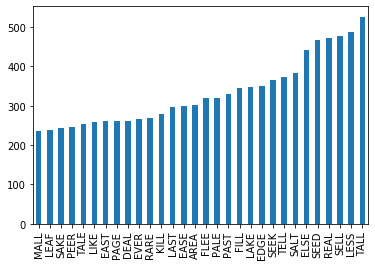

In [59]:
import matplotlib.pyplot as plt
# we create a subset of this s2 dataframe with just the most found words
s3 = s2.iloc[(len(s2)-30):len(s2), 0]
s3.plot.bar()

2 - 
Now, we would like to know the percentage of words found in the proteome depending in their length i.e now how many words found were in 4 letters, 5 letters, etc. 

In [64]:
s2['length_wd'] = 0 # create a new column with 0 as default value 

# fill this column with the length of the corresponding word 
for i in range(0, len(s2)) : 
    s2['length_wd'][i] = len(s2.index[i])

#s2 # to check the output 

/Users/Enfants/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


nb_tot_wd  nb_seq_wd  \
KILLER          1          1   
THREAT          1          1   
AWARD           1          1   
TERMS           1          1   
HEALTH          1          1   
TALENT          1          1   
CRASH           1          1   
PEPPER          1          1   
SIMPLE          1          1   
LEADER          1          1   
WEEKLY          1          1   
PATCH           1          1   
LIMIT           1          1   
SCENE           1          1   
REACT           1          1   
FRESH           1          1   
CARRY           1          1   
PAINT           1          1   
PLENTY          1          1   
CHILD           1          1   
SERIES          1          1   
WATCH           1          1   
NAKED           1          1   
LEGEND          1          1   
PLANET          1          1   
SENATE          1          1   
SAMPLE          1          1   
MENTAL          1          1   
NIGHT           1          1   
SILVER          1          1   
...           ...        ...   
MALL          235        233   
LEAF          238        236   
SAKE          243        241   
PEER          246        245   
TALE          254        246   
LIKE          259        250   
EAST          260        200   
PAGE          260        248   
DEAL          260        256   
EVER          265        251   
RARE          268        264   
KILL          278        272   
LAST          297        290   
EASE          299        293   
AREA          301        293   
FLEE          319        311   
PALE          319        311   
PAST          329        282   
FILL          344        335   
LAKE          348        337   
EDGE          350        340   
SEEK          366        350   
TELL          374        363   
SALT          383        367   
ELSE          442        423   
SEED          468        444   
REAL          472        456   
SELL          477        461   
LESS          486        457   
TALL          526        510   

                                                 list_seq  length_wd  
KILLER                                           [A4D1E1]          6  
THREAT                                           [A6NGD5]          6  
AWARD                                            [B0I1T2]          5  
TERMS                                            [O15061]          5  
HEALTH                                           [O15296]          6  
TALENT                                           [O60307]          6  
CRASH                                            [O75398]          5  
PEPPER                                           [O75751]          6  
SIMPLE                                           [O95759]          6  
LEADER                                           [P01019]          6  
WEEKLY                                           [P02790]          6  
PATCH                                            [P04275]          5  
LIMIT                                            [P06213]          5  
SCENE                                            [P06213]          5  
REACT                                            [P08047]          5  
FRESH                                            [P08235]          5  
CARRY                                            [P12645]          5  
PAINT                                            [P19484]          5  
PLENTY                                           [P43378]          6  
CHILD                                            [P46531]          5  
SERIES                                           [P49770]          6  
WATCH                                            [P63136]          5  
NAKED                                            [P82987]          5  
LEGEND                                           [Q13137]          6  
PLANET                                           [Q13642]          6  
SENATE                                           [Q14643]          6  
SAMPLE                                           [Q15393]          6  
MENTAL                             

In [68]:
s4 = pd.DataFrame(index=range(4, max(s2.length_wd)+1), columns = ['pct_len'])

for i in range(4, max(s2.length_wd)+1) :
    n = 0
    for j in range(0, len(s2)) :
        if s2.length_wd[j] == i : 
            n = n + 1
    s4.pct_len[i]= 100*n/len(s2)  
# s4 # to see the output 

pct_len
4  51.3109
5  38.5768
6  10.1124

Text(0.5, 0, 'Number of letters')

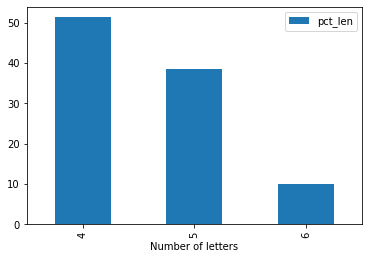

In [69]:
bar_plt = s4.plot.bar()
bar_plt.set_xlabel("Number of letters")

3 - 
Now, we would like to have data on sequences : how many sequences contains common english words of 4 letters or more ? Is there sequences containing more than one word ? how many sequences ? What is the maximum of different words found in a sequence ? 

In [72]:
s5 = pd.DataFrame(columns = ['nb_wd_in_seq'])

for i in range(0,len(s2)) : 
    len_list_seq = len(s2.list_seq[i])
    
    for j in range(0, len_list_seq) : 
        if s2.list_seq[i][j] not in s5.index : 
            s5.loc[s2.list_seq[i][j]] = 1
        else : 
            former_nb = s5.loc[s2.list_seq[i][j]]
            s5.loc[s2.list_seq[i][j]] = former_nb + 1
s5

nb_wd_in_seq
A4D1E1           11
A6NGD5            3
B0I1T2            8
O15061            9
O15296            3
O60307            7
O75398            4
O75751            2
O95759            6
P01019            3
P02790            3
P04275            8
P06213            7
P08047            2
P08235            1
P12645            1
P19484            3
P43378            3
P46531            4
P49770            3
P63136            2
P82987            4
Q13137            6
Q13642            3
Q14643           10
Q15393            3
Q15643            9
Q2PPJ7            5
Q4AC94           12
Q5T4S7           17
...             ...
Q96CH1            1
Q8N6C5            1
Q9Y337            1
Q9P2V4            1
Q92845            1
Q6PI73            1
O75022            1
Q14210            1
Q96RN5            1
Q9NX70            1
Q6ISS4            1
Q6GTX8            1
P13473            1
Q96S19            1
Q9H3R2            1
Q6ZN18            1
O95994            1
Q5JWF8            1
A6NGH8            1
Q86WK6            1
Q96IF1            1
P26368            1
O95467            1
Q96DZ7            1
P0C6A0            1
Q6ZTK2            1
Q8WZ26            1
Q5BKY6            1
Q9P202            1
P37288            1

[13289 rows x 1 columns]

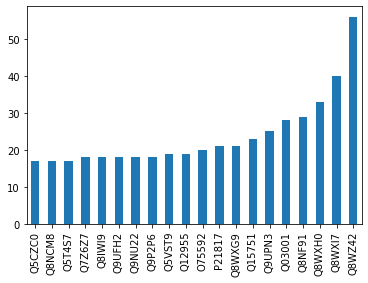

In [71]:
# to order the new tables depending on the number of word found in each sequence 
s6 = s5.sort_values(by ='nb_wd_in_seq') 
# select only the first 20 sequences containing the more words 
s7 = s6.iloc[(len(s6)-20):len(s6), 0]
# plot the result 
s7.plot.bar()